#  IMAGE PROCESSING

In [65]:
# LOAD IMAGE TO NOTEBOOK & RESIZE IT 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
file_path = 'C:\\lavanhoa\\quantum\\Proj\\mnist0.jpg'
img = Image.open(file_path)
# Use 10 qubits-- 2^6 = 64
newsize = (64,64)
img = img.resize(newsize)
img = img.save('resized_mnist0.jpg')

The Shape of the image is: (64, 64, 3)


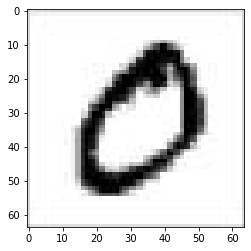

In [3]:
img=plt.imread('resized_mnist0.jpg')
print('The Shape of the image is:',img.shape)
plt.imshow(img)


In [4]:
#from skimage import color
#from skimage import io

#hoa = color.rgb2gray(io.imread('resized_abr.jpg'))
#plt.imshow(hoa)

In [5]:
# CONVERT RGB IMAGE TO GRAY
#def rgb2gray(rgb):
#    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
#    gray = 0.2125 * r + 0.7154 * g + 0.0721 * b
#    return gray

#def rgb2gray(rgb):
#    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
#    gray = 0.3 * r + 0.59 * g + 0.11 * b
#    return gray
#hoa= rgb2gray(img)
#plt.imshow(hoa)


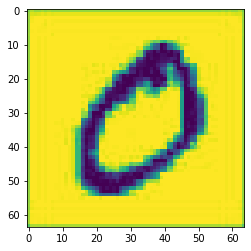

In [66]:
import cv2
img= cv2.imread('resized_mnist0.jpg', 0) / 255
plt.imshow(img)


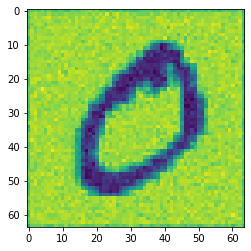

In [74]:
# ADD GAUSSIAN NOISE TO IMAGE 
noise = np.random.normal(0,0.05,img.shape)
img_with_noise = img+noise
plt.imshow(img_with_noise)

In [10]:
img_with_noise.shape

(64, 64)

# RUN QUANTUM QISKIT 

In [41]:

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
from qiskit.circuit import QuantumCircuit, ParameterVector
from scipy import optimize

from qiskit.quantum_info import Operator


# RUN USING REAL QUBIT -- QISKIT BACKEND 
TOKEN='13c09bd6bcd75f7510d5e9bde97dedd79d783a9e708000d317c385fa2f81b9229f4d3ec0844cf77e1e664b61cbc861ea8b87b6c5cca367b61e5f9d514a3c1316'
IBMQ.save_account(TOKEN)
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
for backend in provider.backends():
    try:
        qubit_count= len(backend.properties().qubits)
    except:
        qubit_count="simulated"
    print(f"{backend.name} has {backend.status().pending_jobs} queued {qubit_count} qubits")

# Incomplete code 
from qiskit.tools.monitor import job_monitor 
backend = provider.get_backend('')
job = IBMQ.execute(###, backend = backend)
job_monitor(job)
    

In [32]:
def create_circuit(num_qubits, num_layers):
    
    ###BUILD CIRCUIT1
    circuit1 = QuantumCircuit(num_qubits)
    params1 = ParameterVector('P1')

    for l in range(num_layers):
        for i in range(num_qubits):
            params1.resize(len(params1)+1)
            circuit1.rx(params1[-1],i)
            params1.resize(len(params1)+1)
            circuit1.rz(params1[-1],i)

        for i in range(num_qubits-1,0,-1):
            circuit1.cnot(i,i-1)
        circuit1.barrier()
        
    return circuit1


In [33]:
create_circuit(6,3).draw()

┌───────────┐ ┌───────────┐                     ┌───┐ ░ ┌────────────┐»
q_0: ┤ Rx(P1[0]) ├─┤ Rz(P1[1]) ├─────────────────────┤ X ├─░─┤ Rx(P1[12]) ├»
     ├───────────┤ ├───────────┤                ┌───┐└─┬─┘ ░ ├────────────┤»
q_1: ┤ Rx(P1[2]) ├─┤ Rz(P1[3]) ├────────────────┤ X ├──■───░─┤ Rx(P1[14]) ├»
     ├───────────┤ ├───────────┤           ┌───┐└─┬─┘      ░ ├────────────┤»
q_2: ┤ Rx(P1[4]) ├─┤ Rz(P1[5]) ├───────────┤ X ├──■────────░─┤ Rx(P1[16]) ├»
     ├───────────┤ ├───────────┤      ┌───┐└─┬─┘           ░ ├────────────┤»
q_3: ┤ Rx(P1[6]) ├─┤ Rz(P1[7]) ├──────┤ X ├──■─────────────░─┤ Rx(P1[18]) ├»
     ├───────────┤ ├───────────┤ ┌───┐└─┬─┘                ░ ├────────────┤»
q_4: ┤ Rx(P1[8]) ├─┤ Rz(P1[9]) ├─┤ X ├──■──────────────────░─┤ Rx(P1[20]) ├»
     ├───────────┴┐├───────────┴┐└─┬─┘                     ░ ├────────────┤»
q_5: ┤ Rx(P1[10]) ├┤ Rz(P1[11]) ├──■───────────────────────░─┤ Rx(P1[22]) ├»
     └────────────┘└────────────┘                          ░ └────────────┘»
«     ┌────────────┐                    ┌───┐ ░ ┌────────────┐┌────────────┐»
«q_0: ┤ Rz(P1[13]) ├────────────────────┤ X ├─░─┤ Rx(P1[24]) ├┤ Rz(P1[25]) ├»
«     ├────────────┤               ┌───┐└─┬─┘ ░ ├────────────┤├────────────┤»
«q_1: ┤ Rz(P1[15]) ├───────────────┤ X ├──■───░─┤ Rx(P1[26]) ├┤ Rz(P1[27]) ├»
«     ├────────────┤          ┌───┐└─┬─┘      ░ ├────────────┤├────────────┤»
«q_2: ┤ Rz(P1[17]) ├──────────┤ X ├──■────────░─┤ Rx(P1[28]) ├┤ Rz(P1[29]) ├»
«     ├────────────┤     ┌───┐└─┬─┘           ░ ├────────────┤├────────────┤»
«q_3: ┤ Rz(P1[19]) ├─────┤ X ├──■─────────────░─┤ Rx(P1[30]) ├┤ Rz(P1[31]) ├»
«     ├────────────┤┌───┐└─┬─┘                ░ ├────────────┤├────────────┤»
«q_4: ┤ Rz(P1[21]) ├┤ X ├──■──────────────────░─┤ Rx(P1[32]) ├┤ Rz(P1[33]) ├»
«     ├────────────┤└─┬─┘                     ░ ├────────────┤├────────────┤»
«q_5: ┤ Rz(P1[23]) ├──■───────────────────────░─┤ Rx(P1[34]) ├┤ Rz(P1[35]) ├»
«     └────────────┘                          ░ └────────────┘└────────────┘»
«                         ┌───┐ ░ 
«q_0: ────────────────────┤ X ├─░─
«                    ┌───┐└─┬─┘ ░ 
«q_1: ───────────────┤ X ├──■───░─
«               ┌───┐└─┬─┘      ░ 
«q_2: ──────────┤ X ├──■────────░─
«          ┌───┐└─┬─┘           ░ 
«q_3: ─────┤ X ├──■─────────────░─
«     ┌───┐└─┬─┘                ░ 
«q_4: ┤ X ├──■──────────────────░─
«     └─┬─┘                     ░ 
«q_5: ──■───────────────────────░─
«                               ░

In [35]:
#A PLUG VAO SAU KHI CO IMG WITH NOISE 
A=img_with_noise

In [187]:
# FUNCTION 
def func(x, *args):
    A, qc1, qc2, rank = args
    a = x[:qc1.num_parameters]
    b = x[qc1.num_parameters:]
    U = Operator(qc1.bind_parameters(a)).data
    V = Operator(qc2.bind_parameters(b)).data
    dim = 2**qc1.num_qubits
    #Optimize la optimize cai tong 
    # Xai weighted sum: weighted sum la 1,2,3,4,... ,dim
    m=[]
    
    #weights = np.array(list(range(1,rank+1)))
    s = 0
    m = np.zeros(rank, dtype=np.complex128)
    for i in range(rank):
        m[i] = U[:,i].conj().T @ A @ V[:,i]
        #s += np.real(m[i])/np.sqrt(abs(m[i]))
    #weight = np.array(range(rank,0,-1))
    
    m_abs = np.abs(m)
    s = sum([np.real(m[i]) * (sum(m_abs)-m_abs[i]) / sum(m_abs) for i in range(len(m))])
    print(s)
    return -s

In [169]:
m = [1+2j,2+3j]
m/np.abs(m)

array([0.4472136+0.89442719j, 0.5547002+0.83205029j])

In [142]:
def optimize_svd(A, circuit1, circuit2, rank):
    x0 = 2*np.pi*np.random.rand(circuit1.num_parameters+circuit2.num_parameters)
    result = optimize.minimize(func,x0, (A, circuit1, circuit2, rank),method="L-BFGS-B")
    
    a = result.x[:circuit1.num_parameters]
    b = result.x[circuit1.num_parameters:]
    bound_circuit1 = circuit1.bind_parameters(a)
    bound_circuit2 = circuit2.bind_parameters(b)

    circuit1_matrix = Operator(bound_circuit1).data
    circuit2_matrix = Operator(bound_circuit2).data
    
    u=[]
    v=[]
    dim=2**circuit1.num_qubits
    
    for i in range(rank):
        u.append(circuit1_matrix[:,i])
        v.append(circuit2_matrix[:,i])
        
    m=[]
    for i in range(rank):
        m.append(np.real( u[i].conj().T@A@v[i] ))
        
    d=sorted(m, reverse=True)
    return d,u,v


In [191]:
circuit1 = create_circuit(6,10)
circuit2 = create_circuit(6,10)

In [192]:
d,u,v = optimize_svd(A,circuit1,circuit2,10)

-539.1422595814299
-539.1422578306168
-539.1422618409011
-539.1422593569513
-539.1422597563669
-539.1422577451668
-539.1422598223465
-539.1422544661008
-539.1422580367437
-539.1422586036988
-539.1422567001581
-539.1422606234053
-539.1422595209405
-539.142262458957
-539.1422594241102
-539.1422585979321
-539.1422566658587
-539.1422613841595
-539.1422577567516
-539.1422585149152
-539.14226444009
-539.1422575771542
-539.1422601639781
-539.1422605060721
-539.1422574735715
-539.1422575427636
-539.1422614354558
-539.1422577940158
-539.1422599888313
-539.1422604220289
-539.1422584845769
-539.1422600627296
-539.1422602136122
-539.1422596666181
-539.1422594666392
-539.14226115854
-539.1422604043256
-539.1422623509974
-539.142255025459
-539.1422628229888
-539.1422570456361
-539.1422615516663
-539.1422604078944
-539.1422573349363
-539.1422554771514
-539.1422603283559
-539.1422561205965
-539.1422640918136
-539.1422587769292
-539.1422623280856
-539.1422584865181
-539.1422611596356
-539.1422574300478

1779.0382208981114
1779.0382228327917
1779.0382181390028
1779.0382188138763
1779.038218996728
1779.0382188889132
1779.0382189445293
1779.038221591125
1779.0382199475862
1779.0382219021913
1779.038217568266
1779.038219476354
1779.0382218087511
1779.0382166274449
1779.0382186775316
1779.038221958381
1779.0382213242406
1779.038214992311
1779.038221101446
1779.0382230238458
1779.0382216416474
1779.0382207655707
1779.0382175558577
1779.038221323551
1779.0382176230428
1779.038219038089
1779.038219394831
1779.0382212224904
1779.0382239263163
1779.0382186669874
1779.0382216826624
1779.0382218573425
1779.0382223656634
1779.038217749047
1779.0382227536295
1779.0382223085048
1779.038222281375
1779.0382216947723
1779.0382221484647
1779.0382208540213
1779.0382198455477
1779.0382189047377
1779.0382214776914
1779.0382176528542
1779.0382237742992
1779.0382225960448
2800.614159823997
2800.6141587470124
2800.614165233603
2800.614157603279
2800.614163937288
2800.6141608431026
2800.6141602886537
2800.6141

4717.614018649838
4717.614025469314
4717.614022953586
4717.614020066564
4717.614025558843
4717.614021292286
4717.614025176019
4717.614022776943
4717.614023154977
4717.6140214848465
4717.6140275916905
4717.614029969385
4717.614028476256
4717.614022440214
4717.614026765149
4717.61402229753
4717.614026804461
4717.61402862388
4717.614024042314
4717.614023519704
4717.614029325386
4717.6140258006435
4717.614023351863
4717.614021806288
4717.614023317899
4717.614023600398
4717.61402539025
4717.614026369741
4717.614022750275
4717.614021951381
4717.614023257198
4717.614026385009
4717.614030453224
4717.61402286065
4717.614026951969
4717.614026554337
4717.614023683576
4717.614024331112
4717.614024466207
4717.614027957688
4717.614021963122
4717.614022690804
4717.614022904749
4717.614024308348
4717.614023393403
4717.61402302798
4717.614024562137
4717.614024043869
4717.614018228593
4717.614022190383
4717.614024876959
4717.614026423118
4717.6140188213485
4717.6140242930205
4717.6140272289385
4717.6140

6470.096322569464
6470.096319231528
6470.096325783268
6470.096325994168
6470.096327857674
6470.096322720857
6470.0963256819305
6470.096323454932
6470.096321861353
6470.096325648024
6470.096319398828
6470.096320838374
6470.09632659467
6470.096318606437
6470.096328148632
6470.096320155227
6470.096323260301
6470.096323378888
6470.096320341474
6470.096323057626
6470.096324230368
6470.096325245286
6470.0963239766315
6470.096323446092
6470.096321840119
6470.096324501632
6470.096318236711
6470.096320223984
6470.096318456529
6470.096323659027
6470.096324196879
6470.096321405861
6470.096322127372
6470.096320973918
6470.096323547142
6470.09632264142
6470.096323117436
6470.096321553535
6470.096321801697
6470.096321199531
6470.096320043719
6470.096324474513
6470.096320117012
6470.0963233838675
6470.0963210584005
6470.096323474699
6470.096322791508
6470.096324374948
6470.096328675488
6470.096327348387
6470.096321103991
6470.096326045143
6470.096322690414
6470.096327283802
6470.096323771806
6470.096

8136.909578273612
8136.909570470985
8136.909571462894
8136.909582137126
8136.909572419815
8136.90957568649
8136.909576443299
8136.909570029293
8136.909572061733
8136.909572981095
8136.909572138617
8136.909575385243
8136.909567797895
8136.909584744187
8136.909571129703
8136.909583994744
8136.909573894538
8136.909569477115
8136.909571183346
8136.909584206469
8136.909573007142
8136.909560974615
8136.909571739973
8136.909570615112
8136.909573132085
8136.909576791351
8136.909577034005
8136.909575451728
8136.909576117653
8136.909569102816
8136.909567105674
8136.909564800976
8136.909577680707
8136.90956877918
8136.909562621888
8136.909570410106
8136.909561356251
8136.909562105919
8136.90957358067
8136.909570686041
8136.909577565305
8136.909579087903
8136.9095692811525
8136.909571563151
8136.909568364868
8136.909575525363
8136.909561768226
8136.909577094895
8136.909579430042
8136.909583018099
8136.909574060317
8136.909569615096
8136.909577923171
8136.909575501114
8136.909573822218
8136.9095756

9532.11698129143
9532.116979579288
9532.11698343742
9532.116985566772
9532.116980133345
9532.116984573991
9532.116979465418
9532.116981240377
9532.116980412564
9532.11698267101
9532.116981419458
9532.116979893957
9532.116982364616
9532.116981535624
9532.116982408994
9532.116981803027
9532.116979030456
9532.116980680064
9532.116981600637
9532.116979069859
9532.116982354635
9532.116982779857
9532.116983401693
9532.116983481877
9532.116980989185
9532.116978383721
9532.116980917446
9532.11698527887
9532.116981654832
9532.116979050634
9532.116982387362
9532.116979110979
9532.11698100908
9532.116979963825
9532.116983801374
9532.116980122297
9532.116979458333
9532.116979618522
9532.116983328677
9532.116980867468
9532.1169803831
9532.11697931923
9532.116982099531
9532.116982747864
9532.116984168868
9532.116982394795
9532.11697977787
9532.116982046551
9532.116983104566
9532.116981993207
9532.116982992273
9532.116982118996
9532.116979697834
9532.116979044335
9532.116981579482
9532.11697935709
95

10602.12500704467
10602.125005503924
10602.125005637381
10602.125005646856
10602.125005374353
10602.125008002338
10602.125006923578
10602.125006027423
10602.12500613688
10602.12500412773
10602.125009336509
10602.125008050934
10602.125007359022
10602.125006364127
10602.125003818674
10602.125005399676
10602.12500987893
10602.125008415873
10602.125006890488
10602.125008421717
10602.125005255995
10602.125010456268
10602.125009807578
10602.125005904492
10602.125007529114
10602.125007965102
10602.12500428868
10602.12500454185
10602.125005655465
10602.1250031182
10602.125008442043
10602.125011582713
10602.12500796925
10602.125009127703
10602.12500761704
10602.125005854958
10602.125007171308
10602.125006473743
10602.12500653378
10602.12500351671
10602.125003929305
10602.125001283131
10602.125008077395
10602.125007283868
10602.125007224657
10602.12500889663
10602.125002670507
10602.125008806543
10602.125006964325
10602.125007977267
10602.125003978384
10602.12500619491
10602.125004775937
10602.1

11197.40824680126
11197.408249413733
11197.408249220778
11197.408245255836
11197.408246483212
11197.40824600331
11197.40824866462
11197.408245401544
11197.40824434849
11694.72772447701
11694.727723067828
11694.727723552194
11694.727723490785
11694.727723114489
11694.727728401289
11694.727724375029
11694.727725018718
11694.727724485017
11694.727725088393
11694.727726445517
11694.727724115855
11694.727724696288
11694.72772412029
11694.727725793751
11694.727723783495
11694.727723919246
11694.727726668038
11694.727722680193
11694.72772370213
11694.727724195245
11694.727724547813
11694.727725989364
11694.727724500419
11694.72772546974
11694.727725515273
11694.72772422338
11694.727723318128
11694.727724795903
11694.72772357994
11694.727723828328
11694.727724499557
11694.727723020353
11694.727723286582
11694.727724160044
11694.727725444664
11694.72772343887
11694.727723441965
11694.727728356695
11694.727724054268
11694.727725210252
11694.727726827121
11694.727723359827
11694.727723751022
1169

12044.668251745972
12044.668250484037
12044.66825167546
12044.668249807992
12044.668249889815
12044.668251626625
12044.668253828562
12044.668252616544
12044.668248631238
12044.668250165552
12044.668250346547
12044.668251434121
12044.66825148023
12044.668249571814
12044.668249202785
12044.668247902142
12044.668250052464
12044.668251440246
12044.668253189242
12044.668249838098
12044.66825095154
12044.668252402116
12044.668251556503
12044.668249116108
12044.66825124418
12044.668250097686
12044.668252369682
12044.668248596163
12044.668250055947
12044.668250850482
12044.668252550993
12044.66824931197
12044.668252960542
12044.668251446234
12044.668249053804
12044.668249572847
12044.668249858136
12044.668250426035
12044.668252014095
12044.668248975979
12044.668251552324
12044.668249825647
12044.668248080521
12044.668250630168
12044.66824830458
12044.66825009954
12044.668250582423
12044.668251891388
12044.66825070719
12044.668249261986
12044.668248735792
12044.668251183935
12044.66824931775
12

12648.80944715182
12648.809447695778
12648.809446147749
12648.809447353357
12648.809447906453
12648.809447123436
12648.809446033782
12648.809447660971
12648.809444999608
12648.809447777265
12648.809450634648
12648.809447382457
12648.809447243078
12648.809447453317
12648.80944700832
12648.809447796926
12648.809445203862
12648.809447599957
12648.809447907242
12648.809447852944
12648.809448230431
12648.809448657546
12648.809447009455
12648.80944716207
12648.809448537442
12648.809448021168
12648.80944679817
12648.80944585484
12648.809447521526
12648.80944759216
12648.809446918089
12648.80944736664
12648.809447950262
12648.809449089506
12648.809447031828
12648.80944728255
12648.809447001171
12648.809447339425
12648.809447168394
12648.809447011388
12648.80944764339
12648.809448874063
12648.809447078862
12648.8094457854
12648.809447146088
12648.809448253945
12648.809446591644
12648.809446005254
12648.809448031468
12648.809447102263
12648.809447872884
12648.809449502423
12648.809447597234
1264

13086.40412346892
13086.40412312542
13086.4041223762
13086.404121349327
13086.404123376797
13086.404122180222
13086.404120242825
13086.404123767521
13086.4041229626
13086.404122704673
13086.404123720113
13086.404122579925
13086.404123946537
13086.404122904896
13086.404124047633
13086.404120396823
13086.404122482823
13086.404121976002
13086.404122356274
13086.404122364986
13086.40412337241
13086.404123055972
13086.404120012887
13086.404121188438
13086.404121149433
13086.404119974262
13086.404121055499
13086.404123676228
13086.404121030671
13086.404121502197
13086.404121914122
13086.404121122767
13086.404123859107
13086.404121822343
13086.404122329204
13086.404123933098
13086.404120923122
13086.404120233414
13086.404122662343
13086.404120769917
13086.404121956633
13086.40412015341
13086.40412318931
13086.404124401348
13086.404123273682
13086.40412455306
13086.404122862567
13086.40412135139
13086.404121718882
13086.40412382919
13086.404121554526
13086.404119629584
13086.40412250827
13086.

13318.328861355489
13318.328861130698
13318.328861086615
13318.328862379662
13318.328861167807
13318.328860385336
13318.32886194183
13318.328860059899
13318.328859566966
13318.32886121326
13318.328862653778
13318.328861331329
13318.328858293096
13318.328860944002
13318.328861623299
13318.328859787536
13318.328861870548
13318.328861164546
13318.328860270967
13318.328861655584
13318.328859612144
13318.328861481363
13318.328861689852
13318.328861815988
13318.328861264898
13318.328860566857
13318.328860343587
13318.32886126975
13318.32886042331
13318.328860000749
13318.32886181159
13318.328859862104
13318.328859903488
13318.32886066398
13318.328861477527
13318.328861508795
13318.32886188488
13318.328861944721
13318.328862213726
13318.328861162334
13318.328860944826
13318.328861694943
13318.328861361271
13318.328862511658
13318.328862833705
13318.328861653372
13318.328859732477
13318.328860639756
13318.32886171026
13318.328859912868
13318.328860260066
13318.328860338432
13318.328861301048
1

13477.901036894968
13477.901036221974
13477.90103675174
13477.901037462076
13477.901037140422
13477.90103650897
13477.90103609141
13477.901036393321
13477.901036756093
13477.901036037742
13477.901036543532
13477.901036528561
13477.901036701965
13477.901035986974
13477.901036894653
13477.901037493326
13477.901037326374
13477.901036850784
13477.901037827367
13477.901037110678
13477.901037392396
13477.901036985208
13477.901036858682
13477.901036301577
13477.901036326362
13477.901036912615
13477.901036180961
13477.90103606794
13477.901035724017
13477.901036393578
13477.901037105952
13477.901036934394
13477.901036897352
13477.901036650905
13477.90103670383
13477.901036211459
13477.901036650648
13477.901037414233
13477.901036367111
13477.901036237761
13477.901037021582
13477.901037021506
13477.901036625253
13477.90103737513
13477.901037612895
13477.90103735019
13477.901036524752
13477.90103638885
13477.901036337855
13477.90103671634
13477.901038082577
13477.901038024116
13477.901036702213
13

13601.542789922481
13601.542790385645
13601.542790420017
13601.542790874313
13601.54279005683
13601.54279079656
13601.542790493237
13601.542789995723
13601.542789413286
13601.542791233012
13601.542789991116
13601.542790897025
13601.542790023213
13601.542790787817
13601.542791254422
13601.542788930232
13601.542791238713
13601.542790277439
13601.542789545292
13601.542789735056
13601.542791615284
13601.542791031856
13601.542791096825
13601.542789681904
13601.542791226437
13601.542791146156
13601.542789743951
13601.542789831245
13601.542789911307
13601.54278934359
13601.542789437226
13601.542790319496
13601.542791146252
13601.542790498544
13601.542790162825
13601.542790676482
13601.542790128327
13601.542789902249
13553.913170196352
13553.913172229266
13553.913168580873
13553.91317115922
13553.913169914385
13553.913172749955
13553.913169540529
13553.913170490148
13553.91316397285
13553.913170310481
13553.913172886438
13553.913169121935
13553.913175063199
13553.913164477195
13553.91317067077

13675.753444684633
13675.753442277226
13675.75344206283
13675.75344155408
13675.753442128758
13675.753443158594
13675.753442891031
13675.7534431685
13675.753442021067
13675.75344301171
13675.753442724264
13675.75344301197
13675.753442952206
13675.753442963833
13675.753440991843
13675.753441336969
13675.753442088606
13675.75344122927
13675.753442761681
13675.753441810153
13675.753440091035
13675.753441473891
13675.753443175578
13675.75344088594
13675.753440170307
13675.753441036555
13675.753441602143
13675.753442692034
13675.753442159685
13675.753442181924
13675.753440653578
13675.753441098563
13675.753442034598
13675.753443213973
13675.753441354727
13675.753441011359
13675.753443524207
13675.753442667463
13675.753442732928
13675.753441830588
13675.75344057303
13675.75344169564
13675.75344158472
13675.753442831103
13675.753441459321
13675.753442213365
13675.753441335984
13675.75344341769
13675.753443546015
13675.753441609888
13675.753441118874
13675.75344275244
13675.753441207798
13675.

13850.845433743827
13850.845433286539
13850.845434949922
13850.845434375637
13850.84543311082
13850.845433457427
13850.845435298595
13850.845434158333
13850.845433983928
13850.845433763507
13850.845433723673
13850.845433735358
13850.845433696231
13850.84543392562
13850.845433673469
13850.845434282615
13850.845434011859
13850.845433522367
13850.845433677123
13850.845433915738
13850.845434413302
13850.845434558572
13850.845434015588
13850.845432754713
13850.845433382203
13850.845434160734
13850.845433536459
13850.845434703007
13850.845433778475
13850.845434125518
13850.845434697261
13850.845434131941
13850.845433559634
13850.845434049392
13850.845433816243
13850.84543229304
13850.845433717037
13850.84543406788
13850.845434699539
13850.845433432494
13850.845433689326
13850.845433699182
13850.845433641663
13850.845433518472
13850.845434295372
13850.845433402223
13850.845433910363
13850.845433224276
13850.845434069857
13850.845434047216
13850.845433692244
13850.845434126979
13850.8454336163

13970.0999549407
13970.099956452646
13970.099957199596
13970.099956411626
13970.099956853428
13970.099958307592
13970.099956412223
13970.09995738869
13970.09995675638
13970.099957417166
13970.099957173561
13970.09995591006
13970.099956165237
13970.09995576047
13970.099956689019
13970.0999566962
13970.0999567102
13970.09995670326
13970.099957665196
13970.099957140643
13970.0999559816
13970.09995622193
13970.099956006765
13970.099958283221
13970.099955688791
13970.099957107432
13970.09995777027
13970.09995707169
13970.09995626221
13970.099956264568
13970.099958514518
13970.09995623684
13970.099957756967
13970.099957135037
13970.099957774222
13970.09995731681
13970.099956473327
13970.099956380955
13970.099957522247
13970.09995676797
13970.099957067463
13970.099957432618
13970.099957160814
13970.099956906246
13970.09995733259
13970.099956110687
13970.099957724648
13970.09995592658
13970.09995733183
13970.09995718607
13970.099957925306
13970.099956181679
13970.099957022998
13970.09995770424

14071.49369135942
14071.493691080428
14071.493691983369
14071.493691755151
14071.493691386764
14071.493691805359
14071.49369172974
14071.493691122814
14071.49369138255
14071.493691491143
14071.493691535698
14071.49369175996
14071.493691804917
14071.493691372414
14071.493691196487
14071.493691290927
14071.49369152623
14071.493690639483
14071.493690845431
14071.493691461163
14071.493691589523
14071.4936910892
14071.493692016556
14071.493691974521
14071.49369132839
14071.49369136601
14071.493691909656
14071.493691864416
14071.493691580035
14071.493690359313
14071.493691754105
14071.49369096781
14071.493692281714
14071.49369195348
14071.493691371425
14071.49369181188
14071.493691231659
14071.493691656979
14071.493690949632
14071.49369059408
14071.493691323069
14071.49369192987
14071.493691327261
14071.493691579162
14071.493691151989
14071.493691350259
14071.49369173233
14071.493691470492
14071.493690661133
14071.493691469866
14071.49369097213
14071.493691631076
14071.49369170075
14071.4936

14140.227894033487
14140.227894777609
14140.227894602807
14140.227894256932
14140.227894419499
14140.227894601796
14140.227893894667
14140.22789441495
14140.227894510996
14140.227894613603
14140.227893914756
14140.227893590956
14140.227894074329
14140.227894505664
14140.227894603091
14140.227894473104
14140.227894456006
14140.227894287746
14140.22789448349
14140.227894449736
14140.227894768579
14140.227894054242
14140.227894539195
14140.227894871658
14140.227894893584
14140.2278940014
14173.435171925054
14173.435172868469
14173.43516995881
14173.435171719064
14173.435171533913
14173.435170318415
14173.43517071724
14173.435171494932
14173.43516989084
14173.435171369145
14173.435173588088
14173.435172481732
14173.435174226497
14173.435171287587
14173.43517207505
14173.435172966765
14173.435173483993
14173.435170249493
14173.43517057236
14173.435171874338
14173.435170285196
14173.435172630034
14173.435174079448
14173.435171977444
14173.435170088786
14173.43517094236
14173.435172368878
141

14226.766289369949
14226.766288829163
14226.766289127623
14226.766289429359
14226.766288597522
14226.766289750409
14226.76628811986
14226.766288522165
14226.766288950967
14226.766289092262
14226.766288850386
14226.766289073155
14226.76628927896
14226.766289411205
14226.766288920502
14226.766288513722
14226.766289131418
14226.766289039235
14226.766289061172
14226.76628897478
14226.766289794405
14226.766288492188
14226.766288865623
14226.766289194033
14226.766289091185
14226.76628894054
14226.766289063193
14226.766288984843
14226.766289230647
14226.76628864455
14226.766289217374
14226.766289134941
14226.766288692985
14226.76628967207
14226.766289493284
14226.766289067496
14226.766288858831
14226.766288804662
14226.766289085872
14226.766289620598
14226.766289915475
14226.766288961
14226.766289027484
14226.766289145255
14226.766290052698
14226.766288729568
14226.766289516785
14226.766289794556
14226.766288746632
14226.766289251977
14226.766289410923
14226.766289050809
14226.766289108478
14

14290.49128898306
14290.491289816693
14290.491290054539
14290.491289559477
14290.49128869724
14290.49128955776
14290.491291041515
14290.491289446472
14290.491290358508
14290.491290849563
14290.491289292513
14290.491289768313
14290.491289967516
14290.491288506226
14290.491290674177
14290.491288908972
14290.491290154008
14290.49129013741
14290.49129035975
14290.491288905105
14290.491288812167
14290.491288784622
14290.491289241485
14290.491289883108
14290.49128956335
14290.491289316968
14290.491289571015
14290.491289081223
14290.491289753785
14290.49128989824
14290.491289647483
14290.49129029357
14290.491290369684
14290.49128877862
14290.491289879248
14290.491289717416
14290.491290224554
14290.491290063737
14290.491288472067
14290.491288849307
14290.491289742191
14290.491289689176
14290.491289804148
14290.491289641448
14290.491289947593
14290.491289080257
14290.491289566426
14290.491290230546
14290.491289891996
14290.49129005109
14290.491290293552
14290.491289485562
14290.49128952132
1429

14362.352522271507
14362.352522778856
14362.352523144942
14362.352523315949
14362.352522332867
14362.352522306452
14362.352522790006
14362.352522027644
14362.352522469348
14362.35252284739
14362.352521784944
14362.352522391218
14362.352522855994
14362.352522473215
14362.352522528021
14362.352522326419
14362.352522652236
14362.352522694426
14362.352522361882
14362.352523103198
14362.352522163983
14362.352522703663
14362.352522609712
14362.352522021634
14362.352522403935
14362.352522412033
14362.352522618228
14362.352523293837
14362.352522124314
14362.352522762225
14362.352521995626
14362.352522277439
14362.352522363859
14362.352522108835
14362.352523020329
14362.352522570925
14362.352522273519
14362.352522263389
14362.352523039477
14362.352523444995
14362.35252300586
14362.352522844647
14362.352523104997
14362.352523490872
14362.35252234161
14362.352522657236
14362.35252182761
14362.352522774001
14362.35252243736
14362.352521928664
14362.352521969187
14362.352523044648
14362.35252270502

14434.869639668925
14434.869639874541
14434.86963932266
14434.869639530232
14434.869639853916
14434.869640057517
14434.869639456545
14434.869639212033
14434.869639369595
14434.869638727983
14434.869639596096
14434.869639830435
14434.869638911065
14434.869639047132
14434.869640073768
14434.869640101095
14434.8696398908
14434.869639834513
14434.869639557835
14434.869639686138
14434.86964000143
14434.869639801847
14434.869639538043
14434.869640563948
14434.869639790253
14434.869639367247
14434.869639726652
14434.869638830207
14434.869638412845
14434.869639345681
14434.869640305464
14434.869639706292
14434.869639844723
14434.869639705674
14434.869639487315
14434.869638977685
14434.869639251352
14434.86963976092
14434.869639643166
14434.86963927468
14434.869638416472
14434.869639063794
14434.869639243938
14434.869640110739
14434.869639989432
14434.86963968302
14434.869639318811
14434.869639899669
14434.86963930786
14434.869639771798
14434.869639229883
14434.869639533998
14434.869638783452
1

14430.534908981597
14430.534906701256
14430.534907395158
14430.534906321973
14430.534907674224
14430.534907932155
14430.534909047601
14430.53490967067
14430.534906951541
14430.5349074302
14430.534908641223
14430.534907704832
14430.534908672762
14468.321376714524
14468.321377519082
14468.321375503272
14468.321377004157
14468.321375525371
14468.321375170553
14468.321376880227
14468.321376655109
14468.321375819272
14468.321376679683
14468.32137719858
14468.321376576554
14468.321377558805
14468.321377687724
14468.321376304973
14468.321377288215
14468.321377057822
14468.321377067197
14468.321376634647
14468.321375938103
14468.321376109594
14468.32137701193
14468.321377786586
14468.3213769471
14468.32137565698
14468.321376580405
14468.321377129172
14468.321377772878
14468.321377221977
14468.321377205262
14468.321376371494
14468.321376806083
14468.321377256398
14468.321376695667
14468.321376021551
14468.32137768854
14468.321377770606
14468.321376855058
14468.321377235847
14468.321376031377
14

14504.57093149507
14504.570931625938
14504.570931772852
14504.570932026567
14504.570931071552
14504.570930679172
14504.570931262593
14504.570931376182
14504.570931451732
14504.57093137356
14504.570931347813
14504.57093115404
14504.57093134064
14504.570931669663
14504.570931810844
14504.570931659604
14504.570931646782
14504.570931224365
14504.570931302644
14504.570931527576
14504.570931303904
14504.570931631808
14504.570931647098
14504.57093111267
14504.570931406946
14504.570930707247
14504.570932337187
14504.570931742579
14504.570931103803
14504.57093150265
14504.570931727258
14504.570931676351
14504.570931227776
14504.570931757886
14504.570931555376
14504.570931864506
14504.570931521084
14504.57093057486
14504.570931673268
14504.570930991806
14504.570931487864
14504.570931492148
14504.57093102691
14504.570931366521
14504.570931676322
14504.570930828753
14504.570931170154
14504.57093160241
14504.570931428141
14504.570931130671
14504.57093105542
14504.57093165881
14504.570931683142
1450

14557.567641849604
14557.567642405764
14557.567642697035
14557.56764229216
14557.567642438722
14557.567642205919
14557.567642164962
14557.567641719415
14557.5676421497
14557.567642639298
14557.567641826223
14557.567642730184
14557.567642137945
14557.567642009783
14557.567642337624
14557.56764211767
14557.567642026179
14557.567641983167
14557.567642408485
14557.567642306043
14557.567642156258
14557.567642347038
14557.567641931833
14557.567641913087
14557.567642798987
14557.567642287133
14557.567641932712
14557.567642152178
14557.56764208893
14557.567642146176
14557.567642032875
14557.567642357675
14557.567642417189
14557.567642368345
14557.567642464524
14557.567642355863
14557.567642014918
14557.567642025393
14557.567642262165
14557.56764203463
14557.56764266826
14557.567642469803
14557.567641886775
14557.567641993393
14557.567642030386
14557.567642980268
14557.567642873573
14557.56764202609
14557.56764249137
14557.567642334598
14557.567642214075
14557.567641782338
14557.56764183213
145

14610.865259851265
14610.865259571206
14610.865260076347
14610.865259742422
14610.86525968871
14610.865260090119
14610.865259566028
14610.865259795655
14610.865260370765
14610.865259366083
14610.865260216982
14610.865260412444
14610.865260032879
14610.865259582028
14610.865259422812
14610.865259507254
14610.86525998358
14610.86525984981
14610.865260140994
14610.865259873486
14610.865259357044
14610.865259583341
14610.865260088955
14610.865260236202
14610.86526019957
14610.865259503027
14610.865259949247
14610.865260225219
14610.865260245253
14610.865259776074
14610.865259681255
14610.865260101495
14610.865260457338
14610.86525958745
14610.865260207898
14610.865259922908
14610.865260245278
14610.865259560605
14610.865259353464
14610.86525987537
14610.86526019249
14610.865259877595
14610.865260424152
14610.865259720824
14610.86525988061
14610.865259662058
14610.865259709095
14610.865259471124
14610.865260158895
14610.865259650935
14610.865259856524
14610.865260037077
14610.86525977676
14

14644.601978907738
14644.601978910787
14644.601979384424
14644.601979466617
14644.601979091374
14644.601979169014
14644.601978711391
14644.601978948962
14644.60197930927
14644.601979435434
14644.601979029774
14644.601978800598
14644.601979349778
14644.601979677924
14644.601978500328
14644.60197897689
14644.601979175945
14644.60197905884
14644.601978996734
14644.601979081015
14644.601979044524
14644.601978860555
14644.60197885473
14644.601978869432
14644.601979439361
14644.601978510209
14644.601979136465
14644.601978668863
14644.60197945702
14644.601979067367
14644.60197908007
14644.601979490668
14644.60197926559
14644.601979005813
14644.601979290042
14644.60197914871
14644.60197938195
14644.601978800947
14644.601979109599
14644.601978907851
14644.601979166247
14644.601978801978
14644.601979266987
14644.60197981824
14644.601979298888
14644.601979502968
14644.60197886209
14644.601978783989
14644.601979098985
14644.601979190029
14644.601978755869
14644.601979214516
14644.601978797753
1464

14662.34631642229
14662.34631604516
14686.19221393513
14686.192213701117
14686.192213996404
14686.192213398837
14686.19221413243
14686.192213712886
14686.192214016535
14686.192214012344
14686.19221467402
14686.192213970386
14686.19221270123
14686.192213970275
14686.192212916298
14686.192214743953
14686.19221395365
14686.192213624017
14686.19221338222
14686.192214552919
14686.192214160244
14686.192213722607
14686.192213969072
14686.192214340519
14686.192213551903
14686.192214220708
14686.192214689592
14686.192213822984
14686.192214374823
14686.192213352871
14686.192214153842
14686.192214009934
14686.19221375119
14686.192213360928
14686.192213976603
14686.19221388294
14686.192214579209
14686.19221374343
14686.192213243503
14686.192213797258
14686.192213931507
14686.192214155433
14686.192214388535
14686.19221344322
14686.192214284434
14686.192214445335
14686.192213413045
14686.192213482964
14686.192214126879
14686.192214208591
14686.192214986426
14686.19221398811
14686.192213852259
14686.

14730.982106914536
14730.98210688049
14730.982107586828
14730.982108139262
14730.982107979211
14730.982107911672
14730.982107313743
14730.98210793782
14730.982107798127
14730.982108322516
14730.982107993132
14730.9821077497
14730.982106872294
14730.982107930504
14730.982107595952
14730.982108230872
14730.98210739834
14730.982108280119
14730.982107505757
14730.982108197444
14730.982108730936
14730.982107412845
14730.982108186497
14730.982107588203
14730.982106654052
14730.982107505937
14730.98210689326
14730.982107348033
14730.982107598862
14730.982107539596
14730.982107018292
14730.9821075001
14730.982107723396
14730.982107812553
14730.98210779107
14730.982107493968
14730.98210897666
14730.982108008633
14730.982109018438
14730.982108199096
14730.982107645526
14730.982107621403
14730.98210724597
14730.982107482669
14730.982108677676
14730.982107364538
14730.982108789512
14730.982107608965
14753.546655018221
14753.54665608622
14753.546653943939
14753.54665463508
14753.546653158204
14753.

14809.414978206087
14809.414978529245
14809.414978233503
14809.41497885899
14809.414978353347
14809.414977217517
14809.414978195813
14809.4149787211
14809.414977636556
14809.41497962953
14809.414978246115
14809.414978267405
14809.414978451841
14809.414977562548
14809.414978547049
14809.41497863369
14809.41497809764
14809.414978081486
14809.414978311019
14809.414979329622
14809.414977847839
14809.41497969668
14809.414978105619
14809.414978594954
14809.414977295657
14809.414977650558
14809.414978522673
14809.41497794438
14809.414978222052
14809.414978014524
14809.414977066257
14809.414978541341
14809.414978274965
14809.414977729004
14809.41497769623
14809.41497836498
14809.414978594421
14809.41497834194
14809.414977851813
14809.414977792705
14809.414978067522
14809.41497812121
14809.41497805256
14809.414978431108
14809.414978368246
14809.41497863541
14809.414978508496
14809.414978446071
14809.414978674286
14809.414978147324
14809.414977781315
14809.414977753899
14809.414979116314
14809.4

14849.674168006892
14849.674168112195
14849.67416828903
14849.67416816802
14849.674168193658
14849.674168218633
14849.674168792277
14849.674168432273
14849.674168589869
14849.674168394027
14849.674168069037
14849.674168070509
14849.674168449608
14849.674168191214
14849.674167319983
14849.674167999763
14849.674168242089
14849.674168182184
14849.674168062049
14849.674168008662
14849.674168203046
14849.674167871242
14849.674168585514
14849.674168054964
14849.674167782732
14849.674168353225
14849.674168653506
14849.674167630483
14849.674168102008
14849.67416811134
14849.674168504653
14849.674168492424
14849.67416818825
14849.674167960413
14849.674167988269
14849.674168436102
14849.674168270169
14849.674168076785
14849.674168073849
14849.67416822724
14849.674168579182
14849.674167902733
14849.674167876221
14849.674167996207
14849.67416847845
14849.674168116759
14849.674167753532
14849.674168201625
14849.674168368438
14849.674168443487
14849.67416770091
14849.674168236761
14849.674168600783


14889.095174757076
14889.095174135871
14889.095174863602
14889.09517447925
14889.095174331746
14889.095174827422
14889.095174405888
14889.095174391958
14889.095174669848
14889.095173793563
14889.095174595692
14889.095174287391
14889.095174375845
14889.09517416104
14889.095174486065
14889.095174586846
14889.095174213364
14889.095174817776
14889.095174138463
14889.09517454675
14889.095174480217
14889.095174439926
14889.095174471575
14889.095174022617
14889.095174680855
14889.095174416369
14889.095174259788
14889.095174258007
14889.095174494201
14889.095174228883
14889.095174148464
14889.095174083279
14889.09517420864
14889.095174358888
14889.095174521031
14889.0951747581
14889.095174230863
14889.095174480428
14889.095174441078
14889.095174593065
14889.095174814063
14889.09517459884
14889.095174055508
14889.09517480855
14889.095174225036
14889.095174050812
14889.09517437152
14889.095174500051
14889.095174493063
14889.095174513513
14889.095174645394
14889.095174866367
14889.095174305723
14

14927.14003604819
14927.140036049734
14927.140035676724
14927.140035863571
14927.14003592559
14927.14003606789
14927.140035802733
14927.140036362569
14927.140035874816
14927.140035910705
14927.140036238972
14927.140036214798
14927.140035720508
14927.140035994868
14927.14003608103
14927.140036343248
14927.140036277007
14927.14003609171
14927.140035639424
14927.14003567867
14927.14003636922
14927.140035870158
14927.14003631274
14927.140035999455
14927.1400364551
14927.14003600961
14927.140036010627
14927.140036018936
14927.14003659908
14927.14003631863
14927.140036179517
14927.140036014265
14927.140036162311
14927.140035840432
14927.140035466833
14927.140035960518
14927.140035559558
14927.140035857512
14927.14003633029
14927.14003523358
14927.14003578291
14927.140035821008
14927.140035564891
14927.140035717568
14927.14003586993
14927.14003586603
14927.140036164976
14927.140035548471
14927.140036419509
14927.140036151897
14927.14003602862
14927.140035778797
14927.140035578359
14927.140036

14941.86678818788
14941.866788109257
14941.866788315336
14941.866788067364
14941.866787706762
14941.86678778043
14941.86678775268
14941.8667877048
14941.866788072333
14941.866787244422
14941.86678820048
14941.866787120398
14941.86678815337
14941.866787390378
14941.866787431423
14941.866787984656
14941.86678792648
14941.866788006593
14941.866787325007
14941.866787541545
14941.866787786614
14941.866789028365
14941.866788116879
14941.866788751466
14941.866787920102
14941.866788091476
14941.866788440466
14941.866787608093
14941.866787917274
14941.866788665278
14941.866787166673
14941.866788374273
14941.866787394016
14958.25240144102
14958.252401194477
14958.252401365628
14958.252401564685
14958.252401603084
14958.252401790181
14958.25240151729
14958.252401674454
14958.252401676
14958.252401675332
14958.252401111233
14958.252400983056
14958.252400992455
14958.252401395275
14958.252401326385
14958.25240184201
14958.252401100694
14958.252401638156
14958.252401384216
14958.252400768612
14958.2

In [176]:
# Sort Max to min 
d

[4359.623518957672,
 3078.3278734610885,
 2267.138341917225,
 1788.2864340750432,
 1103.824208692189,
 1017.8317395755356,
 699.3286846996259,
 423.8244322656031,
 176.20504905817222,
 73.82953524524858]

In [177]:
left_svecs, svals, right_svecsh = np.linalg.svd(A)
right_svecs = right_svecsh.conj()

In [190]:
for i in range(len(d)):
    print(d[i], svals[i], abs(d[i]-svals[i]))

1998.4839228226617 14540.613630949278 12542.129708126617
1995.4153245954747 2650.168653967719 654.7533293722443
1956.646591637748 2159.801351315379 203.1547596776311
1956.2250547626418 1774.7663983576604 181.4586564049814
1757.862051537048 1756.7104693282306 1.1515822088174446
1757.4401143417194 1109.8273352223562 647.6127791193633
1497.6366032942908 1018.3692479913889 479.26735530290193
1494.747102083382 986.6109286496363 508.13617343374574
266.4014522839102 873.4381049249699 607.0366526410597
260.6908798391861 837.5837614472285 576.8928816080424


In [61]:
d

[14400.248633782687,
 659.1417455379145,
 173.5122472613868,
 152.7417789292714,
 137.76506814024327,
 111.43640247937905,
 102.67296368068307,
 90.1934393188664,
 86.56417249823077,
 69.1850054847291,
 57.087308335031175,
 54.68402660091732,
 53.06985098878959,
 52.58672156898542,
 50.166236811255985,
 49.09833701520391,
 47.5257172727121,
 44.588235781883384,
 44.208594506099104,
 41.46730732369582,
 39.59920651796843,
 37.746396167772765,
 35.09038140103496,
 33.913199901602525,
 32.43813284579099,
 31.095250420730814,
 20.658243810205928,
 11.655824996969223,
 1.6538370869104524,
 0.9685998286750739,
 -1.2193453463274961,
 -1.4036241172676036,
 -7.15053506386295,
 -7.7528553659515165,
 -9.15345002229025,
 -9.302426192794162,
 -12.727778678228574,
 -20.20818539607845,
 -29.157759232219377,
 -29.295794679795204,
 -30.93856377666735,
 -33.39631082641162,
 -37.996824224708455,
 -43.76095987149361,
 -46.466541696653614,
 -50.861996087032125,
 -52.42877425201688,
 -54.18550760452625,
 -5

In [59]:
svals

array([1.45406136e+04, 2.65016865e+03, 2.15980135e+03, 1.77476640e+03,
       1.75671047e+03, 1.10982734e+03, 1.01836925e+03, 9.86610929e+02,
       8.73438105e+02, 8.37583761e+02, 7.63947959e+02, 7.52146755e+02,
       7.37890540e+02, 7.18790725e+02, 6.85192863e+02, 6.83117697e+02,
       6.57326661e+02, 6.40500183e+02, 6.23814052e+02, 6.05618640e+02,
       5.82802012e+02, 5.78133149e+02, 5.44779337e+02, 5.37767719e+02,
       5.19313270e+02, 5.06631373e+02, 4.80619820e+02, 4.71157500e+02,
       4.61124671e+02, 4.45200841e+02, 4.30421005e+02, 4.13260936e+02,
       4.03595217e+02, 3.87794319e+02, 3.82978324e+02, 3.76750945e+02,
       3.52063514e+02, 3.40321228e+02, 3.29567253e+02, 3.23799357e+02,
       3.03199476e+02, 2.93911372e+02, 2.72209275e+02, 2.57255639e+02,
       2.48994538e+02, 2.38240205e+02, 2.26642015e+02, 2.09132721e+02,
       2.02144417e+02, 1.80296790e+02, 1.69071095e+02, 1.62004483e+02,
       1.39033177e+02, 1.33806029e+02, 1.29255366e+02, 1.04821371e+02,
      

# PICK SINGULAR VALUES


#https://www.geeksforgeeks.org/how-to-get-the-indices-of-the-sorted-array-using-numpy-in-python/#:~:text=We%20can%20get%20the%20indices,help%20of%20argsort()%20method.
#https://stackoverflow.com/questions/30576797/how-to-sort-a-numpy-array-into-a-specific-order-specified-by-a-separate-list-b

# Get the indices/ indexes of the sorted singular values to apply for the singular vectors
indices = np.argsort(m)
indices=np.flip(indices)

# Xu li data type cua u,v 
u=np.array(u)
v=np.array(v)

##Tao ra 2 bien moi: u_moi va v_t de co gi con giu u,v lai; do khoi train lai tu dau 
u_moi=u
#Process lai v 
v_t=v.conj().T

#Apply to the singular vectors
u_moi=u_moi[:,indices]
v_t=v_t[indices,:]

# Lay k gia tri ban dau : phan con lai thi bo 
#Tao ra bien d_moi
k= 64 ###
d_moi=d[:k]
u_moi=u_moi[:,:k]
v_t=v_t[:k,:]

u_moi.shape

v_t.shape

len(d_moi)

# Tao ra matrix sigma tu d 
sigma_matrix = np.zeros((k,k))
np.fill_diagonal(sigma_matrix,d_moi)
sigma_matrix.shape

# RECONSTRUCT

In [117]:
v.shape

(10, 64)

In [119]:
u.shape

(10, 64)

In [182]:
u=np.array(u)
v=np.array(v)
singular_values_matrix= np.diag(d)
new_matrix = u.conj().T @ singular_values_matrix @ v

In [183]:
new_matrix

array([[-9.81283523e-01+2.12975000e-01j,  1.36808507e+00+1.26764970e+00j,
        -9.88961091e-01+2.89116965e+00j, ...,
        -8.21373237e-02-5.75360688e-03j, -2.35487827e-02+4.43993723e-02j,
        -1.23354140e-02-2.40823406e-02j],
       [-1.73773220e+00+6.30713495e-01j, -8.15210755e-01-5.73252490e-01j,
         4.44204329e-01-2.24734238e+00j, ...,
         6.16011762e-02-3.97938843e-03j,  9.28942508e-03-2.51966674e-02j,
        -2.84480417e-02-4.08926343e-02j],
       [-7.89859187e+00+4.67774947e-01j, -2.59035847e+00-3.27689705e+00j,
         5.60799420e+00-1.06635359e+01j, ...,
         3.16510792e-01+7.22761359e-02j,  6.74199266e-02-9.01319709e-02j,
        -6.68275688e-02-2.02468480e-01j],
       ...,
       [-3.50467996e+00+9.53808145e+00j, -5.18738765e+00+1.36683157e+00j,
        -9.67342036e+00-1.20764272e+01j, ...,
         2.47584878e-01-3.35475870e-01j, -7.14848378e-02-1.25640025e-01j,
        -2.72648881e-01-2.52853609e-02j],
       [-1.49742015e-01+2.36941406e+00j, -1.

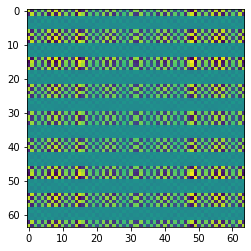

In [123]:
plt.imshow(np.real(new_matrix))